In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer

In [2]:
bank =pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [3]:
bank.shape

(5000, 14)

In [4]:
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
bank.isnull().values.any()

False

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


## **Data distribution in each attribute**

In [7]:
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


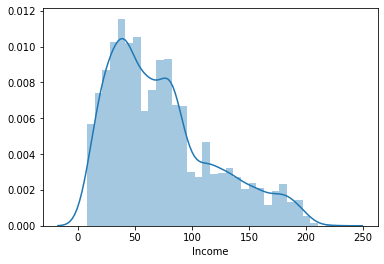

In [8]:
sns.distplot(bank["Income"])

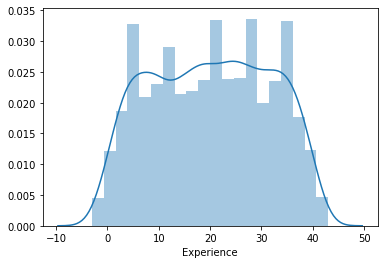

In [9]:
sns.distplot(bank["Experience"])

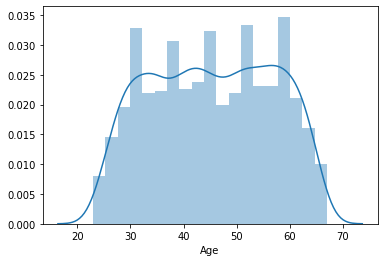

In [10]:
sns.distplot(bank["Age"])

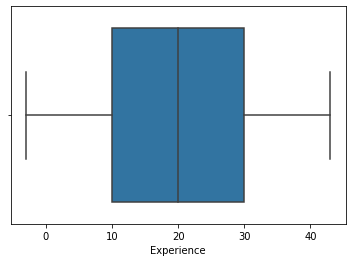

In [11]:
sns.boxplot(bank["Experience"])

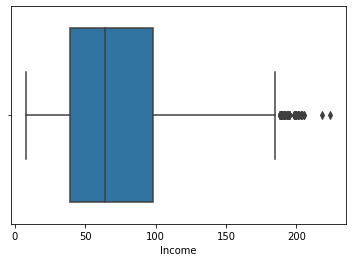

In [12]:
sns.boxplot(bank["Income"])

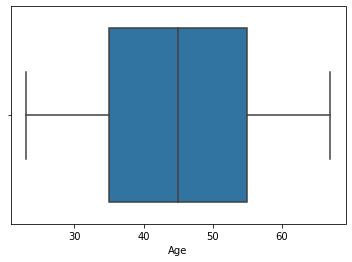

In [13]:
sns.boxplot(bank["Age"])

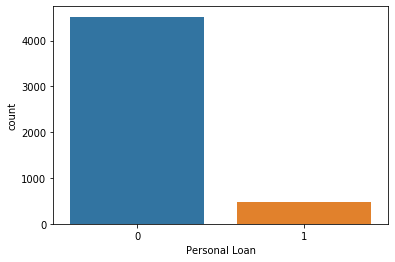

In [14]:
sns.countplot(bank["Personal Loan"])

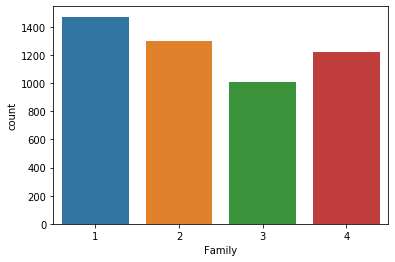

In [15]:
sns.countplot(bank["Family"])

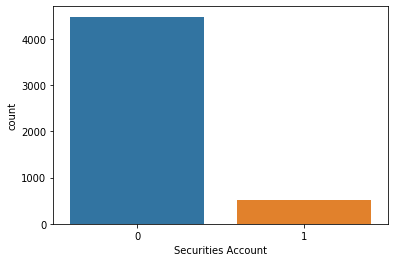

In [16]:
sns.countplot(bank["Securities Account"])

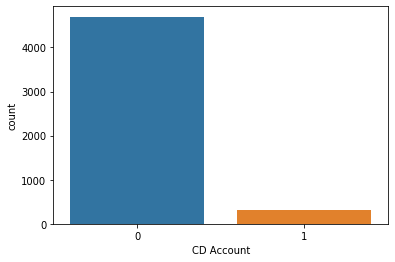

In [17]:
sns.countplot(bank["CD Account"])

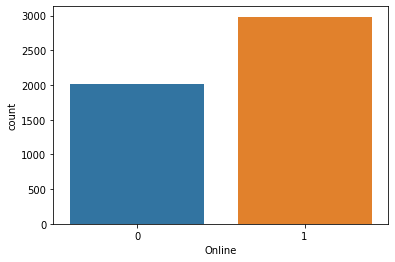

In [18]:
sns.countplot(bank["Online"])

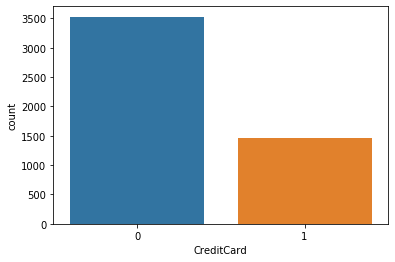

In [19]:
sns.countplot(bank["CreditCard"])

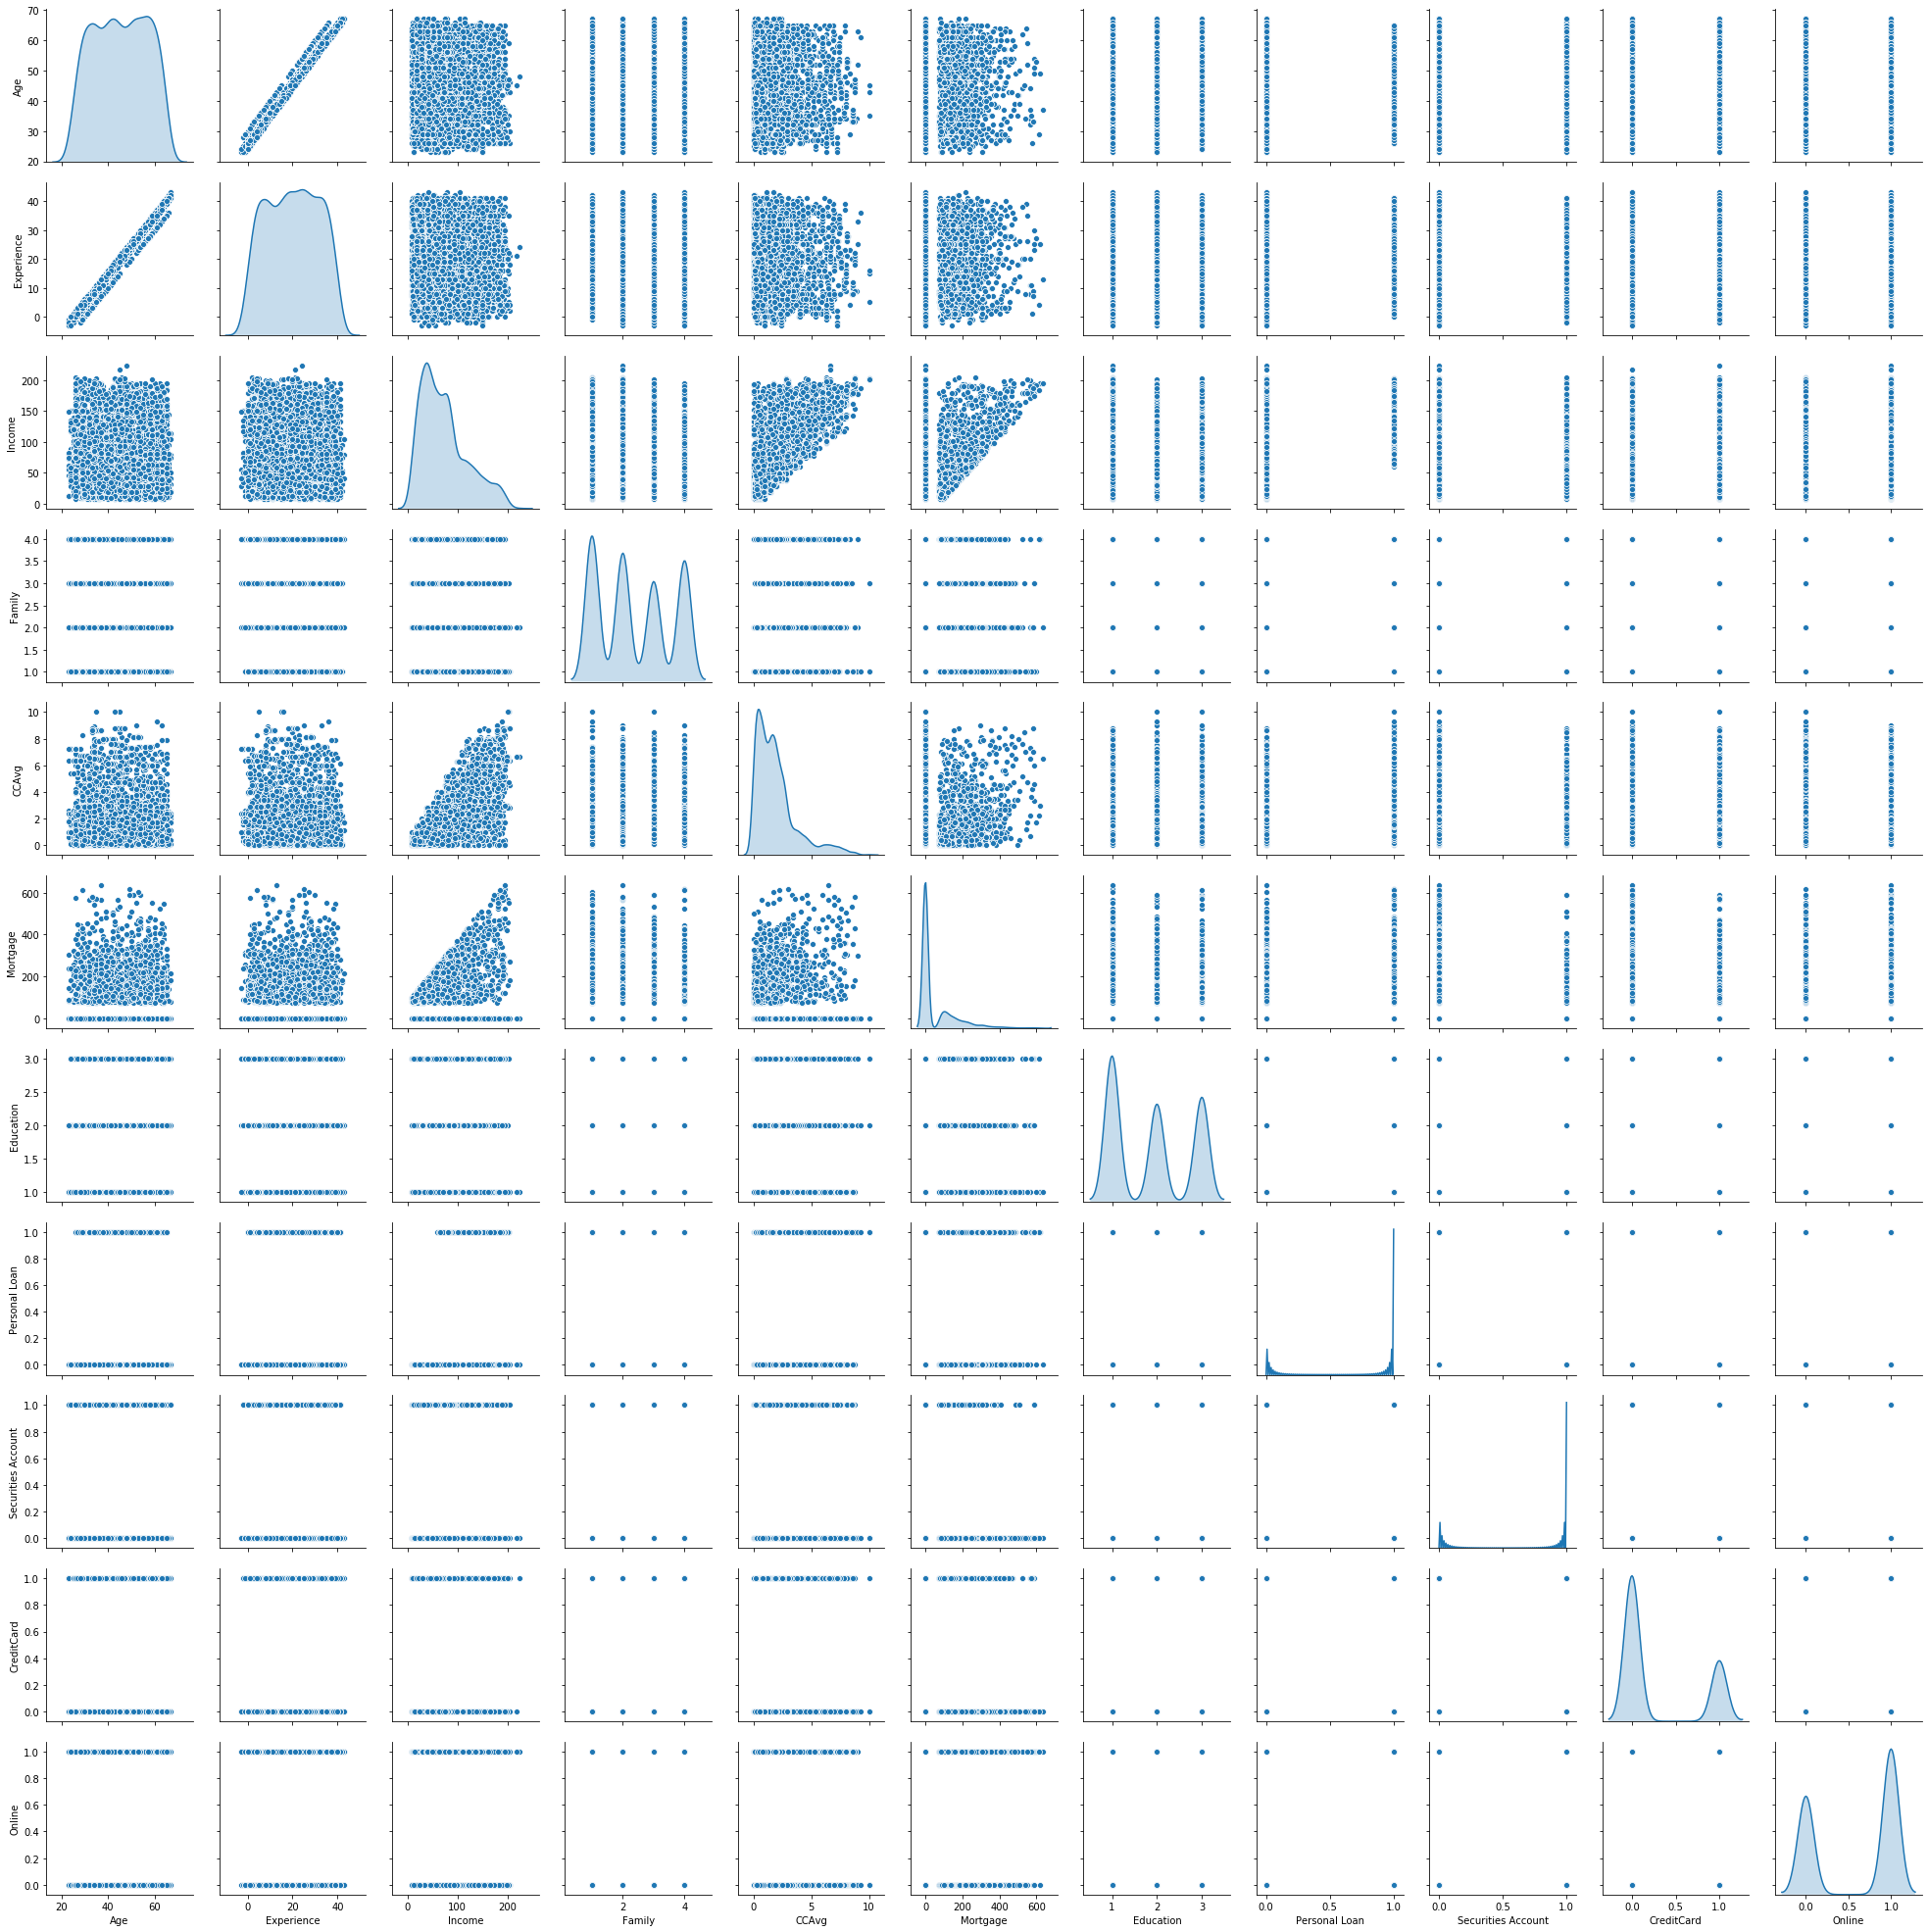

In [20]:
sns.pairplot(bank[["Age","Experience","Income","Family","CCAvg","Mortgage","Education","Personal Loan","Securities Account","CreditCard","Online"]], diag_kind='kde')

In [21]:
corre=bank.corr()
bank.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


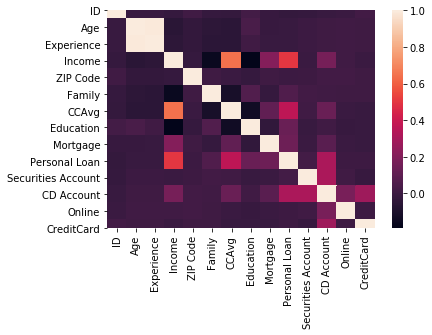

In [22]:
sns.heatmap(corre)

## **Findings**

1. The distribution of each attribute is found.

2. It is found that outliers are present in income while no outlier is present in age & experience attributes.

3. It is found in the income distribution plot that it is left-skewed.

4. The mean, median, minimum,25%,50%,75% and maximum value of each attribute is found out.

**Inference from count table.**

5. People taking personal loans are very less.

6. People prefer online mode.

7. Most of the people in the given data don't have a credit card.

8. People with securities account and CD account are low in the given data.


In [23]:
bank["Personal Loan"].describe()

count    5000.000000
mean        0.096000
std         0.294621
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Personal Loan, dtype: float64

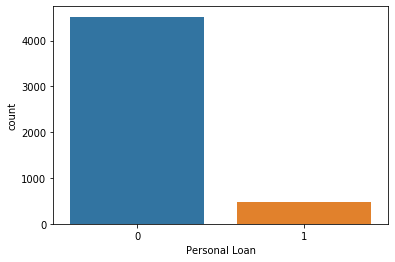

In [24]:
sns.countplot(bank["Personal Loan"])

### **Logistic Regression.**

In [25]:
bank=bank.drop(["ID","ZIP Code"],axis=1)

In [26]:
X = bank.drop('Personal Loan',axis=1)     
Y = bank['Personal Loan']  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1840,55,25,23,4,0.4,3,88,0,0,0,0
2115,57,31,30,3,1.4,1,0,0,0,0,0
4437,63,38,63,2,1.5,1,0,0,0,1,0
1146,31,7,71,1,0.1,1,78,1,0,0,0
2486,61,36,130,1,1.3,1,257,0,0,0,0


In [27]:
a=(len(x_train)/len(bank.index)) * 100
print(a,"% data is in training set")
b=(len(x_test)/len(bank.index)) * 100
print(b,"% data is in test set")

70.0 % data is in training set
30.0 % data is in test set


In [28]:
c=(len(bank.loc[bank['Personal Loan'] == 1]))
c1=(len(bank.loc[bank['Personal Loan'] == 1])/len(bank.index)) * 100
print("Original Personal loans True Values    : ",c,"(",c1,"%)")
d=len(bank.loc[bank['Personal Loan'] == 0]), 
d1=(len(bank.loc[bank['Personal Loan'] == 0])/len(bank.index)) * 100
print("Original Personal loans False Values   : ",d,"(",d1,"%)")
e=len(y_train[y_train[:] == 1])
e1=(len(y_train[y_train[:] == 1])/len(y_train)) * 100
print("Training Personal loans True Values    :",e,"(",e1,"%)")
f=len(y_train[y_train[:] == 0]) 
f1=(len(y_train[y_train[:] == 0])/len(y_train)) * 100
print("Training Personal loans False Values   : ",f,"(",f1,"%)")
g=len(y_test[y_test[:] == 1])
g1=(len(y_test[y_test[:] == 1])/len(y_test)) * 100
print("Test Personal loans True Values        :  ",g,"(",g1,"%)")
h=len(y_test[y_test[:] == 0]) 
h1=(len(y_test[y_test[:] == 0])/len(y_test)) * 100
print("Test Personal loans False Values       :  ",h,"(",h1,"%)")


Original Personal loans True Values    :  480 ( 9.6 %)
Original Personal loans False Values   :  (4520,) ( 90.4 %)
Training Personal loans True Values    : 323 ( 9.22857142857143 %)
Training Personal loans False Values   :  3177 ( 90.77142857142857 %)
Test Personal loans True Values        :   157 ( 10.466666666666667 %)
Test Personal loans False Values       :   1343 ( 89.53333333333333 %)


In [29]:
rep_0 = SimpleImputer(missing_values=0, strategy="mean")
cols=x_train.columns
x_train = pd.DataFrame(rep_0.fit_transform(x_train))
x_test = pd.DataFrame(rep_0.fit_transform(x_test))

x_train.columns = cols
x_test.columns = cols

x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,55.0,25.0,23.0,4.0,0.4,3.0,88.000000,1.0,1.0,1.0,1.0
1,57.0,31.0,30.0,3.0,1.4,1.0,187.162162,1.0,1.0,1.0,1.0
2,63.0,38.0,63.0,2.0,1.5,1.0,187.162162,1.0,1.0,1.0,1.0
3,31.0,7.0,71.0,1.0,0.1,1.0,78.000000,1.0,1.0,1.0,1.0
4,61.0,36.0,130.0,1.0,1.3,1.0,257.000000,1.0,1.0,1.0,1.0


In [30]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.058191  0.070155  0.050494  0.629828  0.092142  1.469759  0.000718   

          7         8         9        10  intercept  
0 -2.256718 -2.256718 -2.256718 -2.256718  -2.256718  


In [31]:
model_score = model.score(x_test, y_test)
print(model_score)

0.9386666666666666


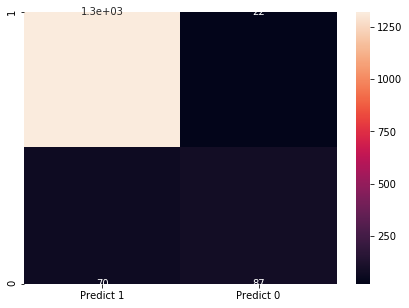

In [58]:
lrm=metrics.confusion_matrix(y_test, y_predict)
lr_m = pd.DataFrame(lrm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(lr_m,annot=True)

In [33]:
print("Classification Report")
print(metrics.classification_report(y_test, y_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.80      0.55      0.65       157
           0       0.95      0.98      0.97      1343

    accuracy                           0.94      1500
   macro avg       0.87      0.77      0.81      1500
weighted avg       0.93      0.94      0.93      1500



## Result

It is found that the model accuracy of **Logistic Regression** is **94%**.

This means the model gives correct result 94% of the time.

### **KNN Classifier**

In [34]:
bank.groupby(["Personal Loan"]).count()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480


In [35]:
XScaled  = X.apply(zscore)  
XScaled.describe()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
count,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03
mean,2.478018e-17,-1.693312e-16,1.939449e-16,7.850609e-16,-2.078338e-17,-6.315837e-16,2.810197e-16,5.092149e-16,4.426903e-16,2.986500e-16,-3.697931e-16
std,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00,1.000100e+00
min,-1.948906e+00,-2.014911e+00,-1.428969e+00,-1.216855e+00,-1.108987e+00,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
25%,-9.019702e-01,-8.812043e-01,-7.554825e-01,-1.216855e+00,-7.084116e-01,-1.049078e+00,-5.555239e-01,-3.414233e-01,-2.535403e-01,-1.216618e+00,-6.453143e-01
50%,-2.952359e-02,-9.121982e-03,-2.123482e-01,-3.454321e-01,-2.506106e-01,1.417029e-01,-5.555239e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,-6.453143e-01
75%,8.429230e-01,8.629604e-01,5.263146e-01,5.259909e-01,3.216407e-01,1.332484e+00,4.375576e-01,-3.414233e-01,-2.535403e-01,8.219509e-01,1.549632e+00
max,1.889859e+00,1.996667e+00,3.263712e+00,1.397414e+00,4.613525e+00,1.332484e+00,5.688108e+00,2.928915e+00,3.944146e+00,8.219509e-01,1.549632e+00


In [36]:
X_train, X_test, y_train, y_test = train_test_split(XScaled, Y, test_size=0.30, random_state=42)

In [37]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )

In [38]:
NNH.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [39]:
predicted_labels = NNH.predict(X_test)
NNH.score(X_test, y_test)

0.96

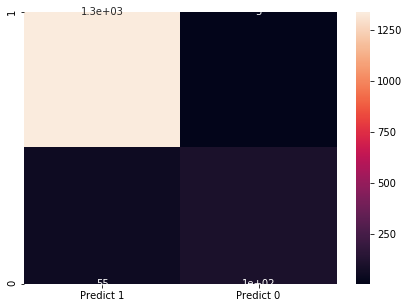

In [52]:
knnm=metrics.confusion_matrix(y_test, predicted_labels)
knn_m = pd.DataFrame(knnm, index = [i for i in ["1","0"]],columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(knn_m, annot=True)

In [41]:
print("Classification Report")
print(metrics.classification_report(y_test, predicted_labels, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.95      0.65      0.77       157
           0       0.96      1.00      0.98      1343

    accuracy                           0.96      1500
   macro avg       0.96      0.82      0.88      1500
weighted avg       0.96      0.96      0.96      1500



## Result

The model accuracy of **KNN Classifier** is **96%**.

This means the model gives correct result 95% of time.

## **Naive Bayes classifier**

In [42]:
X = bank.drop('Personal Loan',axis=1)     
Y = bank['Personal Loan']  
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
x_train.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
1840,55,25,23,4,0.4,3,88,0,0,0,0
2115,57,31,30,3,1.4,1,0,0,0,0,0
4437,63,38,63,2,1.5,1,0,0,0,1,0
1146,31,7,71,1,0.1,1,78,1,0,0,0
2486,61,36,130,1,1.3,1,257,0,0,0,0


In [43]:
bank_model = GaussianNB()
bank_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [44]:
bank_train_predict = bank_model.predict(x_train)
print("Model Accuracy: ",(metrics.accuracy_score(y_train, bank_train_predict)))
print()

Model Accuracy:  0.8825714285714286



In [45]:
bank_test_predict = bank_model.predict(x_test)
print("Model Accuracy:",(metrics.accuracy_score(y_test,bank_test_predict)))
print()

Model Accuracy: 0.892



Confusion Matrix


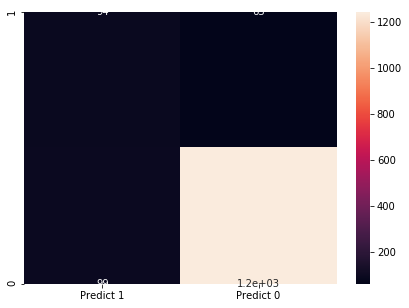

In [56]:
print("Confusion Matrix")
nbtm=metrics.confusion_matrix(y_test, bank_test_predict, labels=[1,0])

nbt_m = pd.DataFrame(nbtm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(nbt_m, annot=True)

In [47]:
print("Classification Report")
print(metrics.classification_report(y_test, bank_test_predict, labels=[1, 0]))

Classification Report
              precision    recall  f1-score   support

           1       0.49      0.60      0.54       157
           0       0.95      0.93      0.94      1343

    accuracy                           0.89      1500
   macro avg       0.72      0.76      0.74      1500
weighted avg       0.90      0.89      0.90      1500



## Confusion matrix of models

In [64]:
print("Confusion matrix of logistic regression")
print("")
print(lr_m)
print("")
print("Confusion matrix of KNN Clasifier")
print("")
print(knn_m)
print("")
print("Confusion matrix of Naive Bayes Theorem")
print("")
print(nbt_m)
print("")

Confusion matrix of logistic regression

   Predict 1  Predict 0
1       1321         22
0         70         87

Confusion matrix of KNN Clasifier

   Predict 1  Predict 0
1       1338          5
0         55        102

Confusion matrix of Naive Bayes Theorem

   Predict 1  Predict 0
1         94         63
0         99       1244



## Result

The model accuracy of **Naive Bayes classifier** is **89**.

This means model gives correct result 89% of the time.

# From the above model of Logistic regression, KNN, and Naive bayes.

- It is found out that the best model is KNN. As we can see that the\ 
  
  accuracy is 96 and the weighted average of recall is 96 which is more than\

  the other two models.

## Reason for KNN being the best model.

- It doesn't make a prior assumption like naive bayes theorem.

- In logistic regression, assumption of linearity is used thus some 

  points may be away from the line where as in KNN distance from nearby 
  
  points are calculated thus more accuracy can be gained.